# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 23-95% R로 분석 다시보기-5-차이를 설명하는 통계모형-1-살충제-1 (62일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 차이를 설명하는 간단한 통계모형

## 살충제를 이용한 ABCDEF 테스트 -- ANOVA


### 1. 데이터 읽기

InsectSprays 는 R 에서 기본적으로 제공하는 데이터 입니다. 따라서 InsectSpray 를 입력하면 데이터 값을 확인 할 수 있습니다. 만일 읽을수 없다면 다음과 같이 진행합니다.

In [4]:
attach(InsectSprays)
data(InsectSprays)
head(InsectSprays)

count,spray
10,A
7,A
20,A
14,A
14,A
12,A


페이지 123 에서 살충제 종류는 6개가 있으며 어느 살충제가 효과가 좋은지 실험한 데이터입니다. 먼저 간단하게 데이터의 형태를 파악해 보아요.

In [5]:
str(InsectSprays)

'data.frame':	72 obs. of  2 variables:
 $ count: num  10 7 20 14 14 12 10 23 17 20 ...
 $ spray: Factor w/ 6 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...


모두 72개의 관측값이 있고 2개의 변수가 있습니다. 여기에는 안보이나 전체 데이터를 보면 각 살충제별 12번 실험 한것으로 되어 있습니다. spray 변수는 6개의 수준을 나타내는데, 이것은 살충제 종류를 말합니다. 6종류의 살충제가 있습니다. count 변수는 살충제의 효과를 나타내는 것으로 죽은 벌레수를 나타냅니다.

### 2. 통계량들..

* a. 각 셀에서 평균, 분산, 그리고 살충수 등을 파악
* b. 데이터의 시각화는 먼저 boxplot 을 사용하여 데이터의 개요를 파악합니다.

각 살충제별 평균을 구하기 위해서는 6개 종류별 살충제를 다음 처럼 구하는 방법이 있습니다. 이것은 각 살충제별로 6번 작업을 해야 할 것입니다.

In [12]:
cat("A mean=", mean(count[spray=='A']), '\n')
cat("B mean=", mean(count[spray=='B']), '\n')
cat("C mean=", mean(count[spray=='C']), '\n')
cat("D mean=", mean(count[spray=='D']), '\n')
cat("E mean=", mean(count[spray=='E']), '\n')
cat("F mean=", mean(count[spray=='F']), '\n')

A mean= 14.5 
B mean= 15.33333 
C mean= 2.083333 
D mean= 4.916667 
E mean= 3.5 
F mean= 16.66667 


이것을 간단하게 tapply(response, factor, function-name) 함수를 사용합니다. t 를 안할 경우에는 jupyter 에선 warning 이 나와서 결과에 t() 함수를 적용했습니다.

In [21]:
# 평균
t(tapply(count, spray, mean))

A,B,C,D,E,F
14.5,15.33333,2.083333,4.916667,3.5,16.66667


In [16]:
# 분산
t(tapply(count, spray, var))

A,B,C,D,E,F
22.27273,18.24242,3.901515,6.265152,3,38.60606


In [17]:
# 표본들의 크기
t(tapply(count, spray, length))

A,B,C,D,E,F
12,12,12,12,12,12


In [19]:
# 그리고 책에 있는 aggregate() 함수를 이용할 수 있습니다.
aggregate(count ~ spray, data=InsectSprays, mean)

spray,count
A,14.500000
B,15.333333
C,2.083333
D,4.916667
E,3.500000
F,16.666667


aggregate() 함수는 formular 를 이용합니다. 우리가 관심있는 것은 살충제의 벌레수에 대한 각 통계량을 알아보는 것이므로 count 에 대한 spray 입니다. 따라서 formular 는 count ~ spray 가 됩니다. 다음에는 적용할 데이터를 지정하고 마지막에는 계산할 함수명을 넣습니다. 지금 평균을 계산하려고 해서 mean 을 넣었습니다.

평균을 보면 A,B,F 가 효과가 있고 C, D, E 는 효과가 적게 나옵니다.

좀더 시각적으로 파악하기 위해서 boxplot 을 이용합니다.  역시 formula 는 count ~ spray 를 사용합니다.

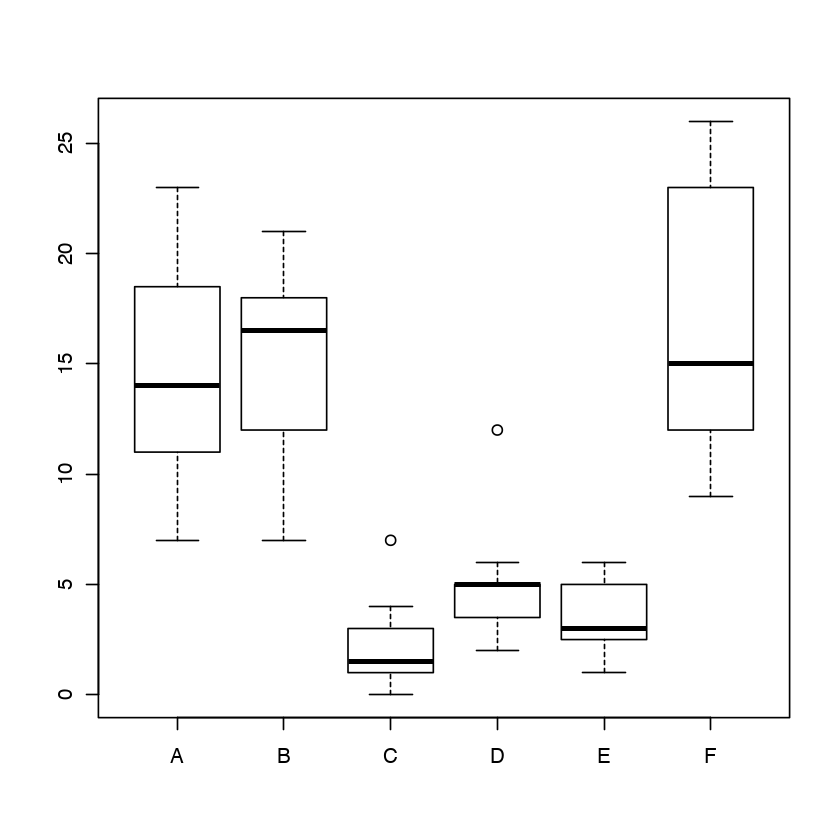

In [22]:
boxplot(count ~ spray, data=InsectSprays)

** 몇가지 주제외로 추가하면**
* 순서는 문자열 순서로 나오지만, 만일 순서를 변경 할 필요가 있을 경우에는 순서를 지정하는 변수를 별로도 지정해서 처리 합니다.
* 예를 들어 순서를 F < B < C < D < E < A 로 변경하려고 하면

In [25]:
myorderedspray <- ordered(spray, levels=c("F", "B", "C", "D", "E", "A"))
t(tapply(count, myorderedspray, mean))

F,B,C,D,E,A
16.66667,15.33333,2.083333,4.916667,3.5,14.5


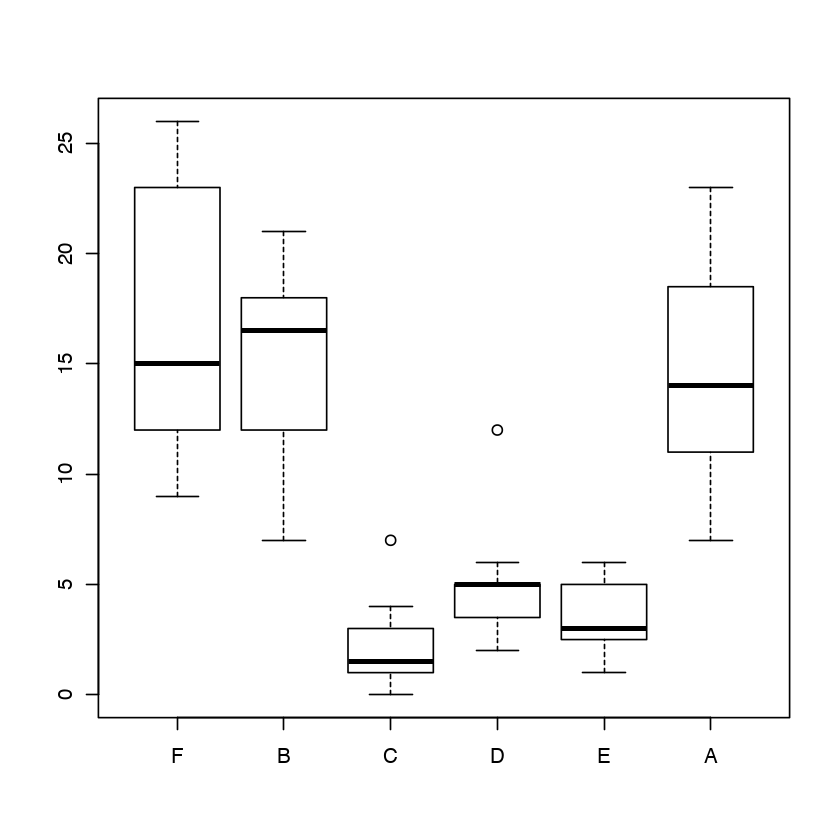

In [26]:
# boxplot 일 경우에도 같은 방법으로 spray
boxplot(count ~ myorderedspray, data=InsectSprays)

* 변수가 범주형 변수인지 확인 하려면, is.factor() 함수를 사용합니다. 즉

In [27]:
is.factor(spray)

[1] TRUE

### 페이지 203 에 있는 방식으로 분산분석 리뷰

#### var() 함수의 분산 확인 ...

* R 에서 분산 계산시 sd() 합수는 n 으로 나누는지 또는 (n-1) 로 나누는지???
   * **R 에서 var() 함수는 표본에 대한 분산 이며 모집단에 대한 분산은 아니다.**

In [28]:
# 샘플데이터 
sdata = c(50,47, 52, 46, 45)

In [30]:
#  mean() 함수 이용 평균
sdata_mean = mean(sdata)
sdata_mean

[1] 48

In [32]:
# N 으로 나눈 평균 
(50 + 47 + 52 + 46 + 45) / 5

[1] 48

In [36]:
# 분산 var() 함수 로 구함
sd(sdata)
sd(sdata)^2
var(sdata)

[1] 2.915476

[1] 8.5

[1] 8.5

In [37]:
# 분산 계산 (devide by n - 1)
sum((sdata - mean(sdata))^2)/ (length(sdata) - 1)

[1] 8.5

In [38]:
# 모 분산 계산 (devide by n)
sum((sdata - mean(sdata))^2)/ length(sdata)

[1] 6.8

In [40]:
# 따라서 모분산 계산은
var(sdata) / length(sdata) * (length(sdata) - 1)

[1] 6.8

#### InsectSprays 에 대한 책에 있는 분산 분석 방법

In [41]:
# 먼저 InsectSprays 에 대한 데이터
head(InsectSprays)

count,spray
10,A
7,A
20,A
14,A
14,A
12,A


In [77]:
# InsectSpray 를 다른 변수에 저장
MyInsectSprays = InsectSprays
total_mean = mean(InsectSprays$count)
sprays_mean = rep(total_mean, length(InsectSprays$count))
head(sprays_mean)
MyInsectSprays['totalmean'] = sprays_mean
head(MyInsectSprays)

[1] 9.5 9.5 9.5 9.5 9.5 9.5

count,spray,totalmean
10,A,9.5
7,A,9.5
20,A,9.5
14,A,9.5
14,A,9.5
12,A,9.5


In [98]:
# 구릅별 평균을 구함
mygmeans = aggregate(count ~ spray, data=InsectSprays, mean)

# group mean 컬럼 설정하고 0으로 초기값 지정
dummy <- rep(0, length(MyInsectSprays))
MyInsectSprays['groupmeans'] <- dummy

# 각 수준별 구릅 평균값 설정
MyInsectSprays[MyInsectSprays$spray == 'A',]$groupmeans <- mygmeans[mygmeans$spray == "A",]$count
MyInsectSprays[MyInsectSprays$spray == 'B',]$groupmeans <- mygmeans[mygmeans$spray == "B",]$count

MyInsectSprays[MyInsectSprays$spray == 'C',]$groupmeans <- mygmeans[mygmeans$spray == "C",]$count
MyInsectSprays[MyInsectSprays$spray == 'D',]$groupmeans <- mygmeans[mygmeans$spray == "D",]$count

MyInsectSprays[MyInsectSprays$spray == 'E',]$groupmeans <- mygmeans[mygmeans$spray == "E",]$count
MyInsectSprays[MyInsectSprays$spray == 'F',]$groupmeans <- mygmeans[mygmeans$spray == "F",]$count

head(MyInsectSprays)


count,spray,totalmean,groupmeans
10,A,9.5,14.5
7,A,9.5,14.5
20,A,9.5,14.5
14,A,9.5,14.5
14,A,9.5,14.5
12,A,9.5,14.5


이제 책에 있는 방식대로 $(y - \bar y), (y - \bar y_x), (\bar y_x - \bar y)$ 의 제곱합을 구합니다. 이것은 분산을 구할때 (n-1)  를 나누지 않은것과 같으므로 결국 분산에 (n-1) 을 곱한것과 같은 결과 입니다.

#### $\sum_{i=1}^{72}(y_i - \bar y)^2$ 구하기

In [106]:
# var * 70
var(MyInsectSprays$count) * (72 - 1)

[1] 3684

In [110]:
# 또는 직접 구하기
yi_ybar = sum((MyInsectSprays$count - MyInsectSprays$totalmean)^2)
yi_ybar

[1] 3684

#### $\sum_{i=1}^{72}(yg_i - \bar y)^2$ 구하기

In [111]:
ygi_ybar = sum((MyInsectSprays$groupmeans - MyInsectSprays$totalmean)^2)
ygi_ybar

[1] 2668.833

#### $\sum_{i=1}^{72}(yi -  yg_i)^2$ 구하기

In [112]:
yi_ygi = sum((MyInsectSprays$count - MyInsectSprays$groupmeans)^2)
yi_ygi

[1] 1015.167

이제 이들 구한것에 대한 관계식을 보면 다음과 같다.
즉
$\sum_{i=1}^{72}(y_i - \bar y)^2 = \sum_{i=1}^{72}(yg_i - \bar y)^2 + \sum_{i=1}^{72}(yi -  yg_i)^2 $

In [113]:
cat("yi_ybar=", yi_ybar, "\n")
cat("ygi_ybar + yi_ygi =", ygi_ybar + yi_ygi, "\n")

yi_ybar= 3684 
ygi_ybar + yi_ygi = 3684 


이들 두개 사이의 관계는 같다. 즉 관측치 전체에 대한 분산 값은 그룹평균에 대한 분산값 에 그룹평균에 대한 개별 수준의 분산값을 더한것과 같게 됩니다.

이제 F-값에 대해서 구해보자. F-값 은 바로 범주형 변수와 그것의 그룹별 차이 정도를 표현할 통계량으로 정의 합니다. 이들을 구하기 위해서 이해하기 쉽게 테이블을 활용하고자 합니다.

In [123]:
totalv <- c(yi_ybar, 71, yi_ybar / 71)
f_table <- data.frame(totalv)
rownames(f_table) <- c("제곱합", "자유도", "분산")
colnames(f_table) <- c("점수")
t(f_table)

,제곱합,자유도,분산
점수,3684,71,51.88732


$(y - \bar y)$ 의 제곱합을 자유도 (72 - 1) 로 나누면 분산이 나옵니다. 그리고 이 제곱합은 두개의 그룹으로 나누어 집니다. 하나는 스프레이별 6개의 그룹별 차이와 6개의 스프레이별 그룹내에서 차이입니다. 이것을 표현하면 다음과 같습니다.

In [126]:
groupiv <- c(yi_ygi, 0, 0)
groupv <- c(ygi_ybar, 0, 0)
totalv <- c(yi_ybar, 71, yi_ybar / 71)
f_table <- data.frame(groupv, groupiv, totalv)
rownames(f_table) <- c("제곱합", "자유도", "분산")
colnames(f_table) <- c("살충제 그룹별", "살충제 그룹내", "점수")
t(f_table)

,제곱합,자유도,분산
살충제 그룹별,2668.833,0,0.00000
살충제 그룹내,1015.167,0,0.00000
점수,3684.000,71,51.88732


자유도에 대해서 구하려면 먼저 살충제 종류를 구해야 합니다. 살충제는 모두 6종류가 있으므로 자유도는 전체 평균이 있으므로 5 가 됩니다. 그럼 살충제 그룹내 자유도는 전체 자유도 71 에서 5를 뺀  66 이 됩니다. 이것을 반영하면 다음과 같습니다.

In [127]:
groupiv <- c(yi_ygi, 66, 0)
groupv <- c(ygi_ybar, 5, 0)
totalv <- c(yi_ybar, 71, yi_ybar / 71)
f_table <- data.frame(groupv, groupiv, totalv)
rownames(f_table) <- c("제곱합", "자유도", "분산")
colnames(f_table) <- c("살충제 그룹별", "살충제 그룹내", "점수")
t(f_table)

,제곱합,자유도,분산
살충제 그룹별,2668.833,5,0.00000
살충제 그룹내,1015.167,66,0.00000
점수,3684.000,71,51.88732


이제 분산은 각각의 제곱에서 자유도로 나눈 값이 되겠습니다. 

In [131]:
groupv <- c(ygi_ybar, 5, ygi_ybar/5)
groupiv <- c(yi_ygi, 66, yi_ygi/66)
totalv <- c(yi_ybar, 71, yi_ybar / 71)
f_table <- data.frame(groupv, groupiv, totalv)
rownames(f_table) <- c("제곱합", "자유도", "분산(평균제곱합)")
colnames(f_table) <- c("살충제 그룹별", "살충제 그룹내", "점수")
f_table <- t(f_table)
f_table

,제곱합,자유도,분산(평균제곱합)
살충제 그룹별,2668.833,5,533.76667
살충제 그룹내,1015.167,66,15.38131
점수,3684.000,71,51.88732


이제 F-값을 구할 수 있습니다. F-값은 설명 할 수 있는 평균제곱합 (살충제 그룹별 분산) 을 설명할수 없는 평균제곱합(살충제 그룹네 분산)으로 나눈값입니다. 즉

In [132]:
f_value <- (ygi_ybar/5) / (yi_ygi/66)
f_value

[1] 34.70228

F-값은 크면 클수롤 그룹간 차이가 크다는 것을 의미합니다. 따라서 살충제의 그룹별 효과가 크다는 것을 말합니다. 지금 구한 F 값은 34.7 이 나왔으나 이값이 큰지 작은지를 알아야 합니다. 이것을 알기 위해 우리는 F-분포에서 P-값을 구하고 그 P-값이 유의수준 0.5 보다 큰지 작은지를 비교하고자 합니다.

In [135]:
# df1 는 그룹간 자유도 즉 살충제 종류 이고 df2 는 그룹내 자유도를 말합니다. 따라서 df1 = 5, df2 = 66 입니다. 
# 이미구한 f값과 자유도를 함수에 f() 함수에 넣으면 p 값이 구해 집니다.
pf(q=34.7022820554917, , df1=5, df2=66, lower.tail=FALSE)

[1] 3.182584e-17

즉 살충제 그룹별 F값은 거의 0에 가깝고, 유의값 0.5 보다 매우 작습니다. 따라서 측정된 살충제 종류별 자료는 일반적인 F분포에서 구할 수 있는 관측값이 아니고 살충제별 차이에서 오는 효과가 매우 크다고 할 수 있습니다. 

실제 살충제별 차이와 관계없는 F 값은 유의 수준 0.5 보다 크게 되는 값이므로 전체 0.95 에 속하는 f 값을 구하면 되겠습니다.

In [136]:
qf(0.95, df1=5, df2=66)

[1] 2.353809

즉 2.35 보다 큰 F 값이면 살충제별 효과는 있다고 봐야 합니다. 우리가 구한값은 34.72 입니다.

R 에서는 aov() 함수를 이용하여 간단하게 구할 수 있습니다. aov 는 Analysis Of Variance 의 약자 입니다.

In [138]:
aov_spray <- aov(count ~ spray, data = InsectSprays)
summary(aov_spray)

            Df Sum Sq Mean Sq F value Pr(>F)    
spray        5   2669   533.8    34.7 <2e-16 ***
Residuals   66   1015    15.4                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

손으로 직접 구한 F 값과 큰차이가 없습니다. F 값은 34.7 이 구해지고, 맨 오른쪽 P 값은 거의 0보다 아주 작게 나옵니다. 즉 스프레이 종류에 따른 카운트의 차이가 없다고 보기에는 너무 큰 차이를 가지고 있습니다.  이것은 통계적으로 말하면, 통계적으로 관측된 결과가 나올 확률은  살충제별 구분이 없다고 하면, 통계적으로 F 분포에서 거의 0 에 가까운 확률은 가지고 있다고 합니다. 

다음은 살충제 분석에 대한 좀더 상세한 내용을 정리 하도록 하겠습니다.